# Guessing the Price of a Rental Using Scikit-Learn

In [156]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
df = pd.read_csv("nyc_rental_data.csv")

In [158]:
len(df)

48895

In [159]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Step 1: Business Understanding

We need to quickly get the rental price of a property to save ourselves and our clients time

## Step 2: Data Understanding

In [160]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
string_columns = list(df.dtypes[df.dtypes == "object"].index)
for column in string_columns:
    df[column] = df[column].str.lower().str.replace(" ", "_")

In [161]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: xlabel='price', ylabel='Count'>

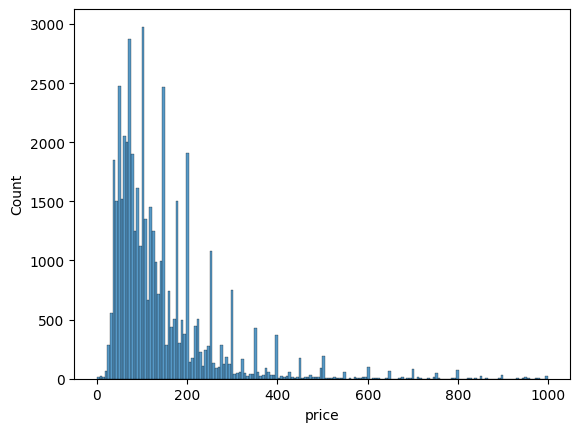

In [162]:
sns.histplot(df.price[df.price < 1000])

In [163]:
log_price = np.log1p(df.price)

<Axes: xlabel='price', ylabel='Count'>

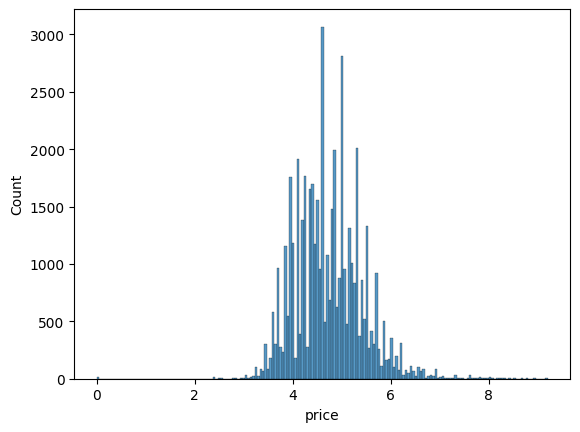

In [164]:
sns.histplot(log_price)

In [165]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Step 3: Data Preparation

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [168]:
df_train_full.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21838,17545558,private_room_2_in_east_village_(large_window),12302104,anna,manhattan,east_village,40.72208,-73.98109,private_room,73,1,116,2019-06-02,4.07,2,238
47539,35796194,"super_nice_flat_in_nolita,_nyc",33144953,carly,manhattan,nolita,40.72206,-73.99695,entire_home/apt,189,4,0,NaN,NaN,1,317
25386,20305160,beach_house_retreat._15_minutes_from_manhattan.,1715301,mark,staten_island,fort_wadsworth,40.59546,-74.06092,entire_home/apt,800,7,0,NaN,NaN,3,365
24173,19472944,charming_2_bed_2_bath_with_washing_dryer,113805886,yaacov,manhattan,upper_east_side,40.77854,-73.94984,entire_home/apt,265,31,7,2019-06-19,0.30,33,345
27875,21829006,room:_minimalist_artist_loft_williamsburg,43490965,nicole,brooklyn,bedford-stuyvesant,40.69854,-73.94069,private_room,50,2,4,2018-01-01,0.21,1,0


In [169]:
len(df_train_full) / len(df)

0.8

In [170]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [171]:
len(df_val) / len(df), len(df_test) / len(df), len(df_train) / len(df)

(0.2, 0.2, 0.6)

In [172]:
df_train.price.values

array([ 54,  55,  89, ..., 130, 100, 125], shape=(29337,))

In [173]:
n = len(df)

In [174]:
df_train.price.values, df_val.price.values

(array([ 54,  55,  89, ..., 130, 100, 125], shape=(29337,)),
 array([ 45,  27,  30, ..., 600,  38, 200], shape=(9779,)))

In [175]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [176]:
y_train.mean(), y_val.mean(), y_test.mean()

(np.float64(153.88523025530898),
 np.float64(149.96666325800183),
 np.float64(151.98108191021578))

## Step 4: Modeling

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
df_train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [179]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


In [180]:
base = ["host_id", "latitude", "longitude", "minimum_nights", "reviews_per_month", "price"]
df_based = df_based.fillna(df_based.mean())

X_based = df_based.drop("price", axis=1)
y_based = df_based["price"]

model = LinearRegression()

model.fit(X_based, y_based)

predictions = model.predict(X_based)

print(model.coef_)  # w0, bias
print(model.intercept_)  # other weights

[ 1.46289035e-07  1.96983487e+02 -8.05288849e+02  3.15453761e-01
 -5.06557733e+00]
-67428.51964086111
